<a href="https://colab.research.google.com/github/saadkhalidabbasi/EDA-Projects/blob/main/Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Housing Price Prediction**

### **Following Steps are taken for Exploratory Data Analysis**

1. Loading Data and Libraries
2. Understanding Data Structure
3. Summarize Data
4. Data Cleaning
5. Univariate Analysis
6. Bivariate Analysis
7. Multivariate Analysis
8. Outlier Detection
9. Feature Engineering
10. Conclusions

### **Importing DataSet and Libraries**

In [25]:
# Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Loading Dataset
df = pd.read_csv('housing_price_dataset.csv')

### **Understanding Data**

In [27]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [28]:
df.tail()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957
49999,1572,5,3,Rural,2011,221618.583218


In [29]:
df.shape

(50000, 6)

In [30]:
df.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [31]:
df.dtypes

,0
SquareFeet,int64
Bedrooms,int64
Bathrooms,int64
Neighborhood,object
YearBuilt,int64
Price,float64


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


### **Summarize the DataSet**

In [33]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [34]:
df.isnull().sum()/len(df)*100

,0
SquareFeet,0.0
Bedrooms,0.0
Bathrooms,0.0
Neighborhood,0.0
YearBuilt,0.0
Price,0.0


In [35]:
df.duplicated().sum()

0

### **Data Cleaning**

In [36]:
df.isnull().sum()

,0
SquareFeet,0
Bedrooms,0
Bathrooms,0
Neighborhood,0
YearBuilt,0
Price,0


In [37]:
df.duplicated().sum()

0

In [38]:
df = pd.get_dummies(df)

### **Univariate Analysis**

<Axes: xlabel='Price', ylabel='Count'>

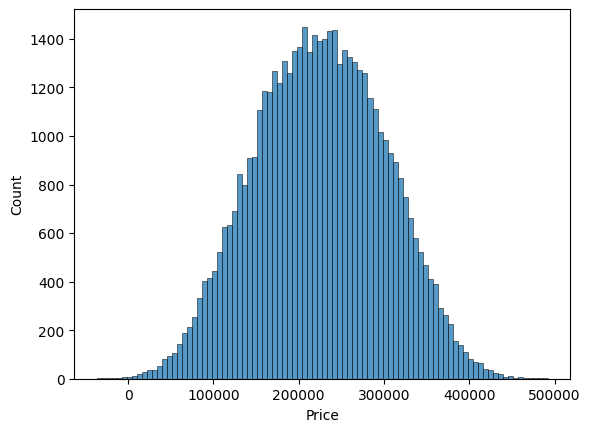

In [39]:
sns.histplot(df['Price'])

<Axes: xlabel='YearBuilt', ylabel='Count'>

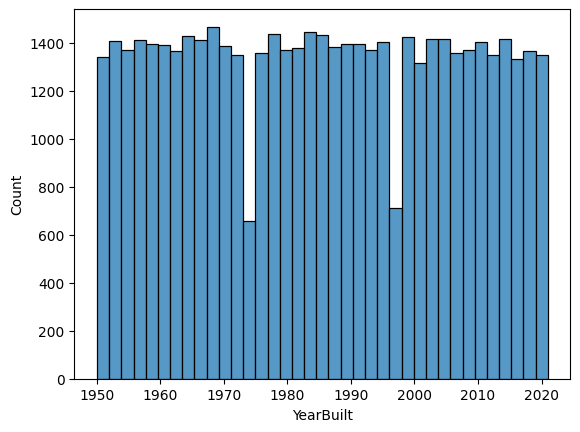

In [40]:
sns.histplot(df['YearBuilt'])

In [41]:
df['Price'].mean()


224827.32515099045

In [42]:
df['Price'].median()

225052.14116600397

### **Bivariate Analysis**

In [43]:
# Finding Correlations
df.corr()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
SquareFeet,1.000000,-0.002638,-0.003275,0.000482,0.750720,-0.005843,-0.007665,0.013528
Bedrooms,-0.002638,1.000000,0.007405,0.003147,0.072624,0.005156,-0.003029,-0.002127
Bathrooms,-0.003275,0.007405,1.000000,0.003748,0.028418,-0.003672,0.004551,-0.000883
YearBuilt,0.000482,0.003147,0.003748,1.000000,-0.002288,-0.001747,0.003793,-0.002051
Price,0.750720,0.072624,0.028418,-0.002288,1.000000,-0.006793,-0.014831,0.021658
Neighborhood_Rural,-0.005843,0.005156,-0.003672,-0.001747,-0.006793,1.000000,-0.501434,-0.498778
Neighborhood_Suburb,-0.007665,-0.003029,0.004551,0.003793,-0.014831,-0.501434,1.000000,-0.499788
Neighborhood_Urban,0.013528,-0.002127,-0.000883,-0.002051,0.021658,-0.498778,-0.499788,1.000000


### **Plots**

<Axes: xlabel='Price', ylabel='SquareFeet'>

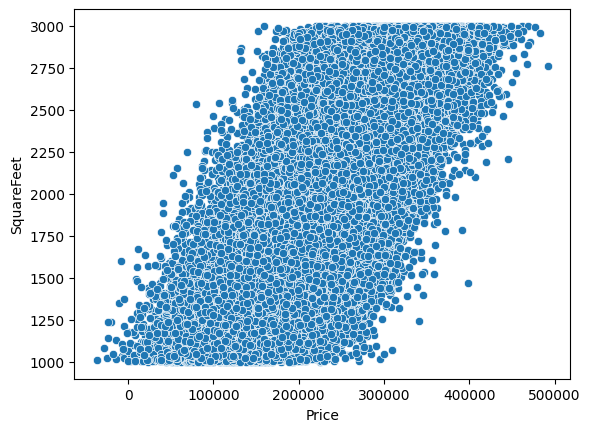

In [44]:
sns.scatterplot(x='Price',y='SquareFeet',data=df)


<Axes: xlabel='Price', ylabel='SquareFeet'>

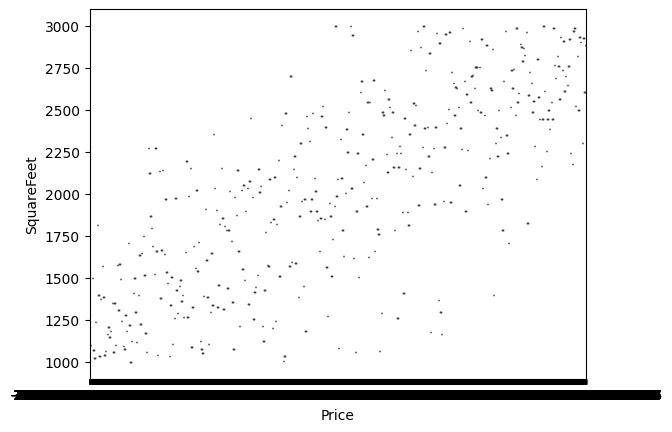

In [24]:
sns.boxplot(x='Price',y='SquareFeet',data=df)